# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Mounting Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv', encoding = "ISO-8859-1", engine='python')

**DATA** **INSPECTION**

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

*   As we can there is not a single null value in our dataset

In [7]:
# Converting Date column into datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [8]:
# Extracting month year day from the Date column
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year 
df['Day']   = df['Date'].dt.day

In [9]:
# Droping Year and Date column as we won't be needing them 
df.drop('Year',axis=1,inplace = True)
df.drop('Date',axis=1,inplace = True)

In [10]:
# Converting the dtype into 'category'
df['Month'] = df['Month'].astype('category') 
df['Hour']  = df['Hour'].astype('category') 
df['Day']   = df['Day'].astype('category') 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  Month                      8760 n

# *EDA(Exploratory Data Analysis)*

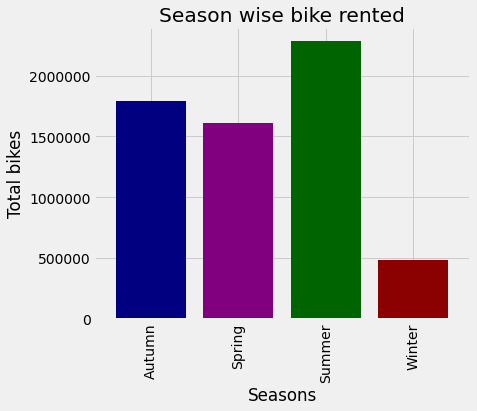

In [12]:
# let's see Number of bikes rented season wise
season_wise_bike = df.groupby(['Seasons'])['Rented Bike Count'].sum()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,5))
color = ['navy','purple','darkgreen','darkred']
season_wise_bike.plot(kind='bar',color = color,width = 0.80)
plt.title('Season wise bike rented')
plt.ylabel('Total bikes')
plt.xlabel('Seasons')
plt.ticklabel_format( style='plain',axis ='y')

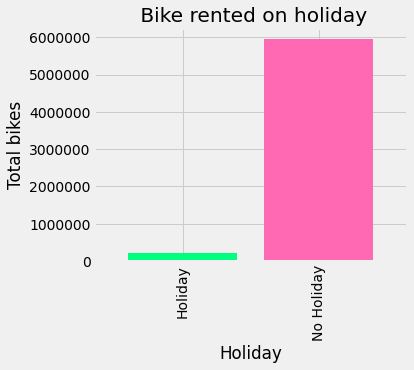

In [13]:
# let's see number of bikes rented on holidays
Holiday = df.groupby(['Holiday'])['Rented Bike Count'].sum()
plt.figure(figsize=(5,4))
plt.style.use('fivethirtyeight')
color = ['springgreen','hotpink',]
Holiday.plot(kind='bar',color = color,width = 0.80)
plt.title(' Bike rented on holiday')
plt.ylabel('Total bikes')
plt.ticklabel_format( style='plain',axis ='y')

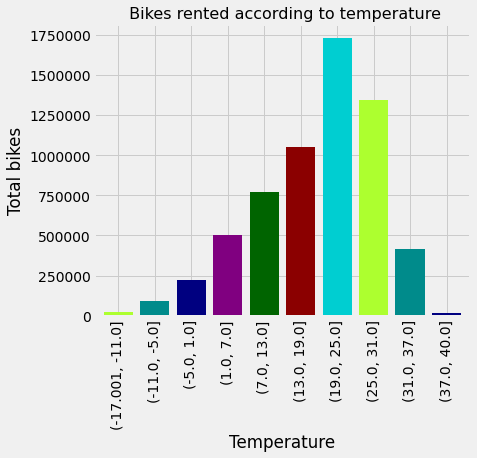

In [14]:
# let's Bikes rented according to temperature
bins = [-17,-11,-5,1,7,13,19,25,31,37,40]
temperature_wise = df.groupby(pd.cut(df['Temperature(°C)'], bins=bins,include_lowest=True))['Rented Bike Count'].sum()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,5))
color = ['greenyellow','darkcyan','navy','purple','darkgreen','darkred','darkturquoise']
temperature_wise.plot(kind='bar',color = color,width = 0.80)
plt.title(' Bikes rented according to temperature',fontsize = 16)
plt.ylabel('Total bikes')
plt.xlabel('Temperature')
plt.ticklabel_format( style='plain',axis ='y')

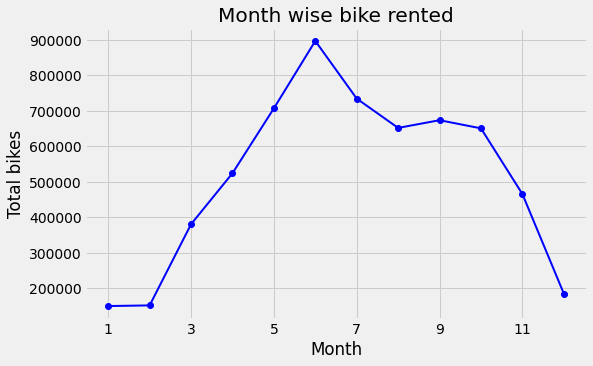

In [15]:
# let's see monthly trend of bikes rented
month_wise = df.groupby('Month')['Rented Bike Count'].sum()
plt.figure(figsize=(8,5))
plt.style.use('fivethirtyeight')
month_wise.plot(color = 'b',linewidth = 2,marker = 'o')
plt.title('Month wise bike rented')
plt.ylabel('Total bikes')
plt.xlabel('Month')
plt.ticklabel_format( style='plain',axis ='y')

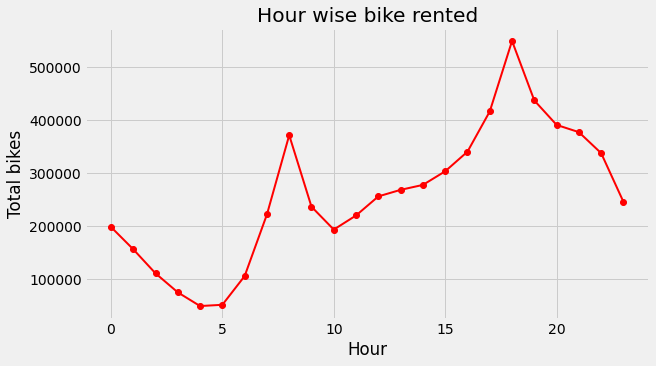

In [16]:
# let's see peak hours 
hour_wise = df.groupby(['Hour'])['Rented Bike Count'].sum()
plt.figure(figsize=(9,5))
plt.style.use('fivethirtyeight')
hour_wise.plot(color = 'r',linewidth = 2,marker = 'o')
plt.title('Hour wise bike rented')
plt.ylabel('Total bikes')
plt.xlabel('Hour')
plt.ticklabel_format( style='plain',axis ='y')

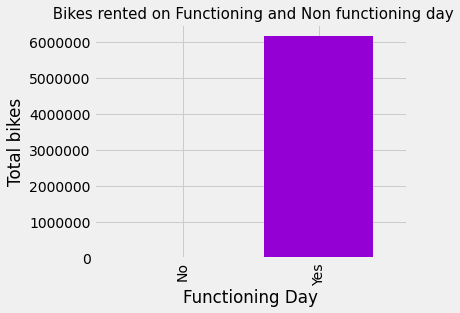

In [17]:
functioning_day = df.groupby(['Functioning Day'])['Rented Bike Count'].sum()
plt.figure(figsize=(5,4))
plt.style.use('fivethirtyeight')
color = ['springgreen','darkviolet',]
functioning_day.plot(kind='bar',color = color,width = 0.80)
plt.title(' Bikes rented on Functioning and Non functioning day',fontsize = 15)
plt.ylabel('Total bikes')
plt.ticklabel_format( style='plain',axis ='y')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


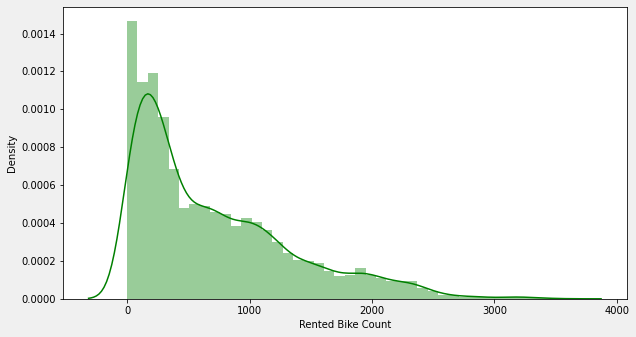

In [18]:
# let's see the distribution of our target variable
plt.figure(figsize=(9,5))
plt.style.use('default')
sns.distplot(df['Rented Bike Count'],color = 'g')


> **As we can clearly see that our target variable is right skewed so we will normalise the distribution**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


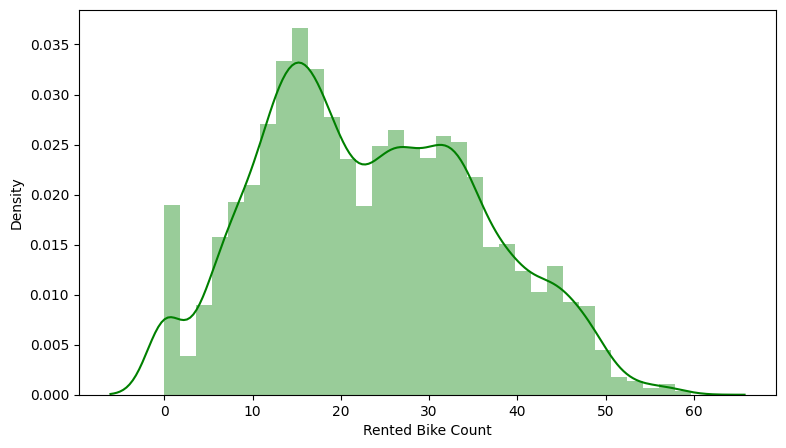

In [19]:
# Normalizing the dependent variable by square root
plt.figure(figsize=(9,5))

sns.distplot(np.sqrt(df['Rented Bike Count']),color = 'g')

In [20]:
# Numerical columns of our dataset
numerical_features = list(df.describe().columns)
numerical_features

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

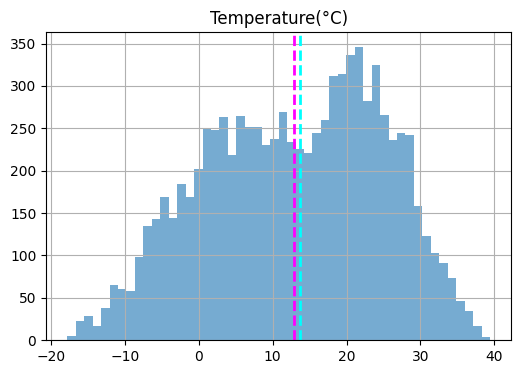

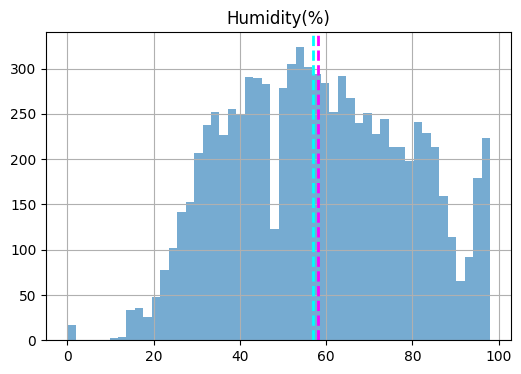

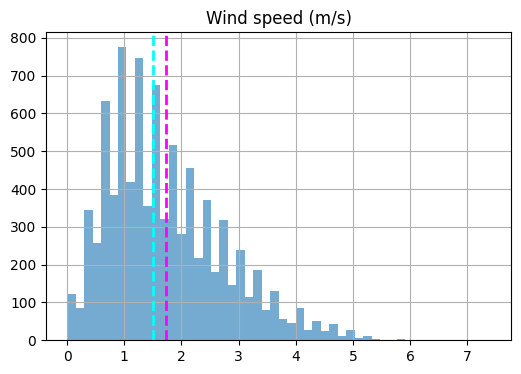

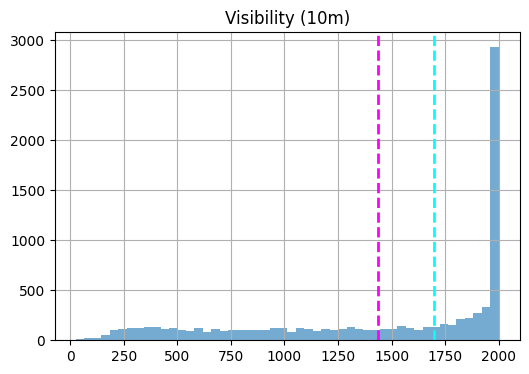

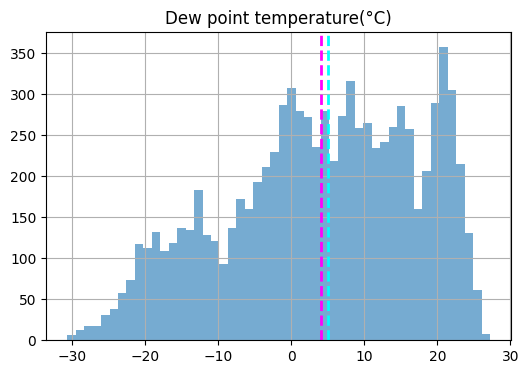

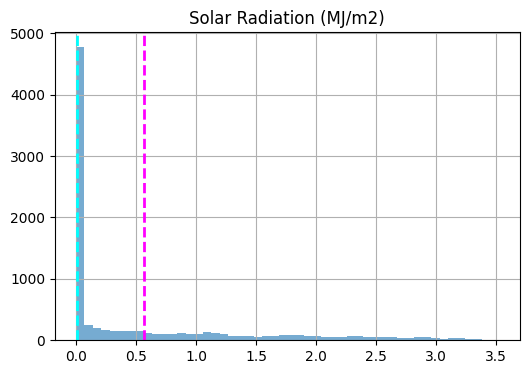

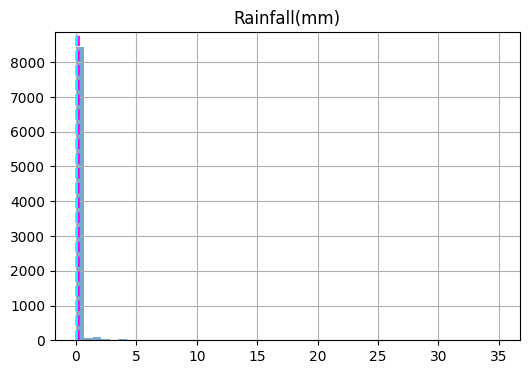

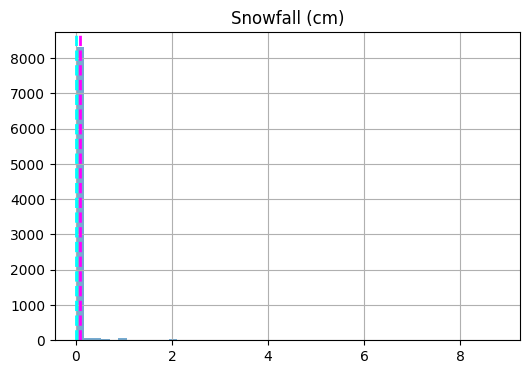

In [21]:
# Plotting histogram for each numerical column
plt.style.use('default')
for col in numerical_features[1:]:
    fig = plt.figure(figsize=(6,4))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax, alpha = 0.61)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()